Epoch 1/35
402/402 [==============================] - 1s 2ms/step - loss: 8.9116 - accuracy: 0.5319 - val_loss: 1.4874 - val_accuracy: 0.6016
Epoch 2/35
402/402 [==============================] - 1s 2ms/step - loss: 1.8881 - accuracy: 0.5500 - val_loss: 4.4117 - val_accuracy: 0.4888
Epoch 3/35
402/402 [==============================] - 1s 2ms/step - loss: 2.0200 - accuracy: 0.5496 - val_loss: 1.7219 - val_accuracy: 0.5165
Epoch 4/35
402/402 [==============================] - 1s 2ms/step - loss: 1.8952 - accuracy: 0.5485 - val_loss: 4.4701 - val_accuracy: 0.4601
Epoch 5/35
402/402 [==============================] - 1s 2ms/step - loss: 1.3267 - accuracy: 0.5661 - val_loss: 1.0520 - val_accuracy: 0.5720
Epoch 6/35
402/402 [==============================] - 1s 2ms/step - loss: 1.7177 - accuracy: 0.5465 - val_loss: 2.9138 - val_accuracy: 0.4741
Epoch 7/35
402/402 [==============================] - 1s 2ms/step - loss: 1.6015 - accuracy: 0.5444 - val_loss: 1.1272 - val_accuracy: 0.5315
Epoch 

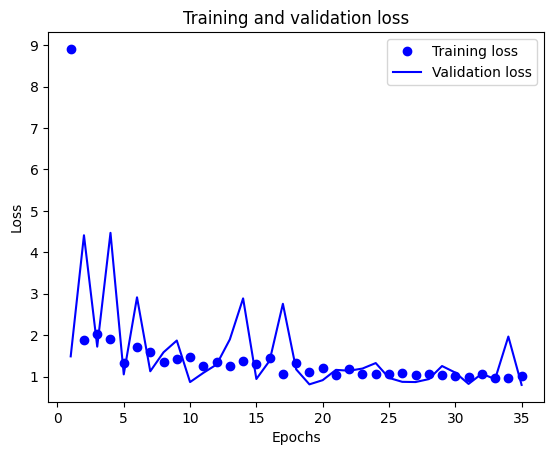

126/126 [==============================] - 0s 1ms/step - loss: 0.7911 - accuracy: 0.6186
Test Loss: 0.7911024689674377
Test Accuracy: 0.6186440587043762


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Завантаження даних
data = pd.read_csv('chess_games.csv')

# Перетворення стовпчика 'winner' на числові значення
data['winner'] = data['winner'].map({'Draw': 0, 'Black': 1, 'White': 2})

# Тепер можна внести зміни до df_clean без попереджень
data['rating_diff'] = abs(data['white_rating'] - data['black_rating'])
data['is_white_higher'] = (data['white_rating'] > data['black_rating']).astype(int)
data['victory_status'] = data['victory_status'].map({'Out of Time': 2, 'Resign': 0, 'Mate': 3, 'Draw': 1})

# Вибір вхідних ознак і міток
features = data[['white_rating', 'black_rating', 'opening_moves', 'rating_diff', 'is_white_higher', 'victory_status']]
labels = data['winner']

# Розділення даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Створення та компіляція моделі
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Навчання моделі з валідацією
history = model.fit(X_train, y_train, epochs=35, validation_split=0.2)

# Візуалізація результатів
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Оцінка моделі на тестовому наборі
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


In [2]:
import tensorflow as tf

img_size = 128  # Замініть це значення на розмір, який ви хочете використовувати

Train = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\User\Desktop\Data Analysis\PandasBears\Train",
    shuffle=True,
    image_size=(img_size, img_size)
)

Test = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\User\Desktop\Data Analysis\PandasBears\Test",
    shuffle=True,
    image_size=(img_size, img_size)
)


Found 500 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, MaxPooling2D, Conv2D
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



In [4]:
class_names = Train.class_names
class_names

['Bears', 'Pandas']

In [5]:
Test.class_names

['Bears', 'Pandas']

In [6]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_size,img_size),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255.0)
])
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [7]:
model = Sequential()
model.add(resize_and_rescale)
model.add(data_augmentation)
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(img_size,img_size)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(3))
model.add(Activation('sigmoid'))

In [8]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
history= model.fit(Train,
         epochs = 5,
         verbose = 1,
         batch_size = 32,
         validation_data = Test)

Epoch 1/5
16/16 [==============================] - 7s 330ms/step - loss: 0.6032 - accuracy: 0.7160 - val_loss: 0.1987 - val_accuracy: 0.9300
Epoch 2/5
16/16 [==============================] - 5s 322ms/step - loss: 0.1458 - accuracy: 0.9540 - val_loss: 0.0779 - val_accuracy: 0.9800
Epoch 3/5
16/16 [==============================] - 5s 322ms/step - loss: 0.0573 - accuracy: 0.9780 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 4/5
16/16 [==============================] - 5s 323ms/step - loss: 0.0137 - accuracy: 0.9960 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 5/5
16/16 [==============================] - 5s 322ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 8.3720e-04 - val_accuracy: 1.0000


In [11]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 23ms/step


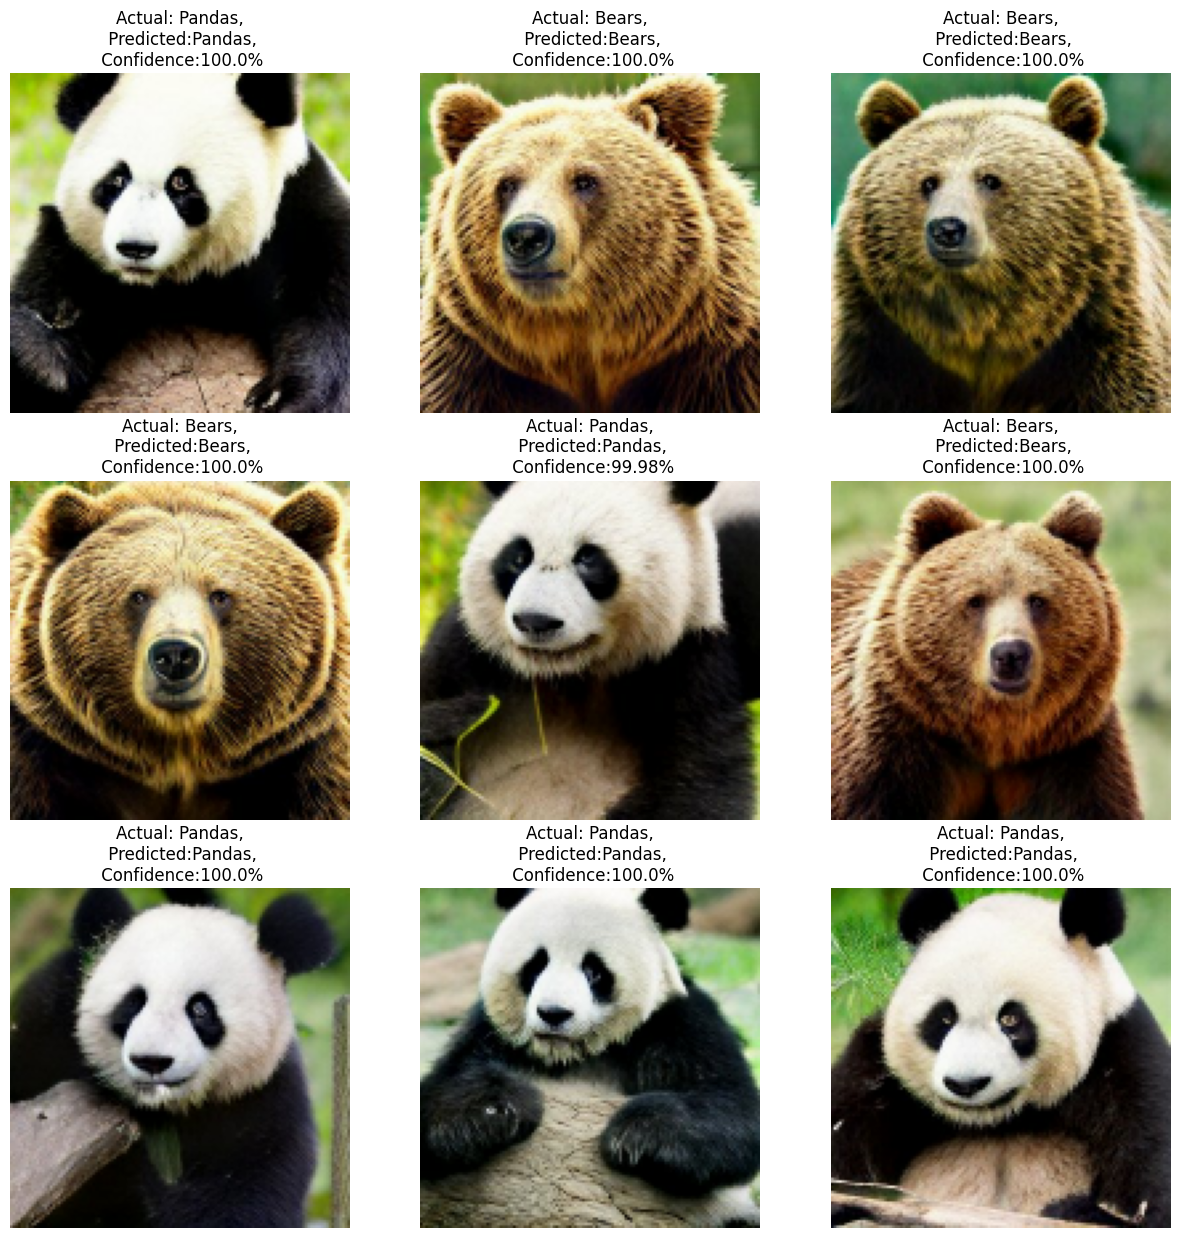

In [12]:
plt.figure(figsize=(15,15))
for images, labels in Test.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis(False)
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted:{predicted_class},\n Confidence:{confidence}%")

Found 500 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Epoch 1/5
16/16 [==============================] - 7s 326ms/step - loss: 0.6598 - accuracy: 0.6560 - val_loss: 0.2604 - val_accuracy: 0.9900
Epoch 2/5
16/16 [==============================] - 5s 325ms/step - loss: 0.1410 - accuracy: 0.9580 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 3/5
16/16 [==============================] - 5s 321ms/step - loss: 0.1076 - accuracy: 0.9440 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 4/5
16/16 [==============================] - 5s 323ms/step - loss: 0.0224 - accuracy: 0.9920 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 5/5
16/16 [==============================] - 5s 322ms/step - loss: 0.0264 - accuracy: 0.9920 - val_loss: 0.0089 - val_accuracy: 1.0000


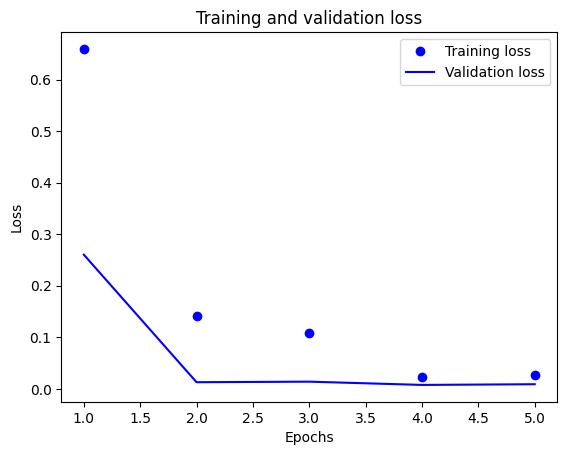

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, MaxPooling2D, Conv2D
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

img_size = 128

Train = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\User\Desktop\Data Analysis\PandasBears\Train",
    shuffle=True,
    image_size=(img_size, img_size)
)

Test = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\User\Desktop\Data Analysis\PandasBears\Test",
    shuffle=True,
    image_size=(img_size, img_size)
)

resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_size, img_size),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255.0)
])

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

model = Sequential()
model.add(resize_and_rescale)
model.add(data_augmentation)
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(img_size, img_size)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(3))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(Train,
                    epochs=5,
                    verbose=1,
                    batch_size=32,
                    validation_data=Test)

# Візуалізація результатів
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Замініть 'AmazonClean.csv' на шлях до вашого файлу
text = pd.read_csv('AmazonClean.csv')

df = text

# Ознаки (текстова змінна)
corpus = df['lemmas']  # Перевірте, чи 'lemmas' - це правильна назва стовпця

# Цільова змінна (замініть 'rating_category' на правильну назву стовпця)
y = df['rating_category']  # Перевірте, чи 'rating_category' - це правильна назва стовпця

# Ініціалізація та побудова мішка слів зі stop_words та ngram_range
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))
X = vectorizer.fit_transform(corpus)

# Перетворення розріджених тензорів у щільні
X_dense = X.toarray()

# Розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.2, random_state=42)

# Розмір словника (величина виходу Embedding-шару)
vocab_size = len(vectorizer.get_feature_names_out())

# Розмір вхідного тексту (кількість слів у тексті)
input_length = X_train.shape[1]

# Збудуйте рекурентну нейромережу
emb_dim = 128
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=emb_dim, input_length=input_length))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Скомпілюйте модель
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Виведіть інформацію про модель
model.summary()

# Навчіть модель
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Оцініть результати на тестовому наборі
results = model.evaluate(X_test, y_test)
print("Test loss, Test accuracy:", results)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 156596, 128)       20044288  
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 20176001 (76.97 MB)
Trainable params: 20176001 (76.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
